In [0]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd

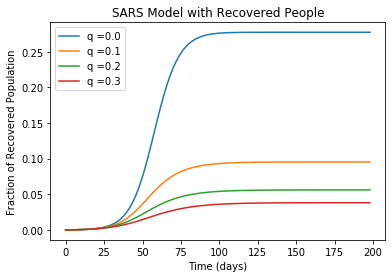

In [0]:

b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q_values = np.arange(0,0.4,0.1)

for q in q_values:

  start_time = 0
  end_time = 200
  dt = 2
  
  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  #plt.plot(np.arange(start_time,end_time,dt),(S+Sq)/N)
  # plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  # plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  # plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  #plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='q =' + str(round(q,2)))
  # plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  # plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  # plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  plt.plot(np.arange(start_time,end_time,dt),R/N,label='q =' + str(round(q,2)))
  plt.legend()
  plt.xlabel('Time (days)')
  #plt.ylabel('Fraction of Susceptible Population')
  plt.ylabel('Fraction of Recovered Population')
  plt.title('SARS Model with Susceptible People')
  plt.title('SARS Model with Recovered People')





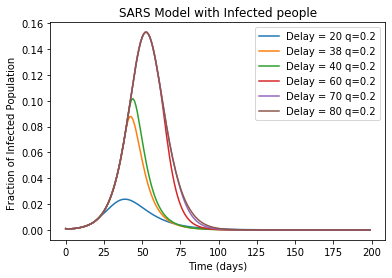

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
q = 0.2
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)


start_time = 0
end_time = 200
dt = 1

n = int((end_time - start_time) / dt )

S = np.zeros(n)
Sq = np.zeros(n)
E = np.zeros(n)
Eq = np.zeros(n)
Iu = np.zeros(n)
Id = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)
Iq = np.zeros(n)

S[0] = N - 1e4
Iu[0] = 1e4
qv = [20,38,40,60,70,80]
for x in qv:
  for i in range(1,len(S)):
    if i<=x:
      q=0
    else:
      q=0.2
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  # plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
  #plt.plot(np.arange(start_time,end_time,dt),(S+Sq)/N,label='k ='+ str(round(k,2)))
  # plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  # plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  plt.plot(np.arange(start_time,end_time,dt),(Iu)/N,label='Delay = '+ str(x)+' q=0.2')
  # plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  # plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  # plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  # plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
  plt.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Fraction of Infected Population ')
  plt.title('SARS Model with Infected people')

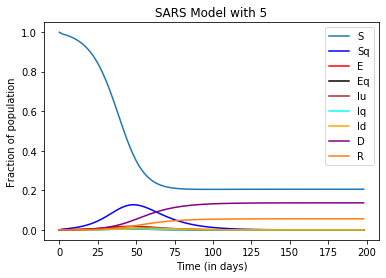

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q = 0.2

start_time = 0
end_time = 200
dt = 2

n = int((end_time - start_time) / dt )

S = np.zeros(n)
Sq = np.zeros(n)
E = np.zeros(n)
Eq = np.zeros(n)
Iu = np.zeros(n)
Id = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)
Iq = np.zeros(n)

S[0] = N - 1e4
Iu[0] = 1e4

for i in range(1,len(S)):
  S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of population')
plt.title('SARS Model with 5')
plt.show()

S5=S
Iu5=Iu

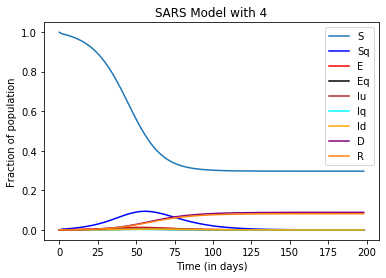

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.09
w = 0.0625

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q = 0.2

start_time = 0
end_time = 200
dt = 2

n = int((end_time - start_time) / dt )

S = np.zeros(n)
Sq = np.zeros(n)
E = np.zeros(n)
Eq = np.zeros(n)
Iu = np.zeros(n)
Id = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)
Iq = np.zeros(n)

S[0] = N - 1e4
Iu[0] = 1e4

for i in range(1,len(S)):
  S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of population')
plt.title('SARS Model with 4')
plt.show()

S4=S
Iu4=Iu

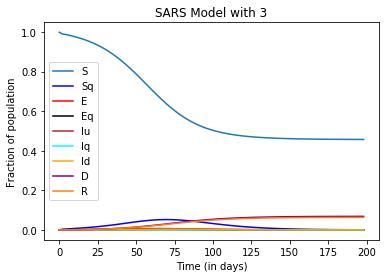

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.09
w = 0.1326

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q = 0.2

start_time = 0
end_time = 200
dt = 2

n = int((end_time - start_time) / dt )

S = np.zeros(n)
Sq = np.zeros(n)
E = np.zeros(n)
Eq = np.zeros(n)
Iu = np.zeros(n)
Id = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)
Iq = np.zeros(n)

S[0] = N - 1e4
Iu[0] = 1e4

for i in range(1,len(S)):
  S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of population')
plt.title('SARS Model with 3')
plt.show()

S3=S
Iu3=Iu

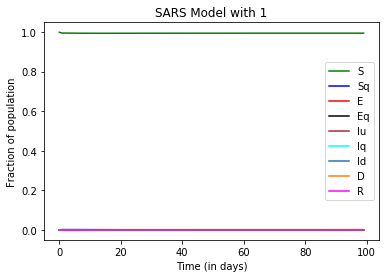

In [0]:
b = 0.06 
k = 10 
m = 0.2775
N = 1e7
p = 0.2
u = 0.1
v = 0.09
w = 0.6326

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q = 0.2

start_time = 0
end_time = 100
dt = 1

n = int((end_time - start_time) / dt )

S = np.zeros(n)
Sq = np.zeros(n)
E = np.zeros(n)
Eq = np.zeros(n)
Iu = np.zeros(n)
Id = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)
Iq = np.zeros(n)

S[0] = N - 1e4
Iu[0] = 1e4

for i in range(1,len(S)):
  S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
plt.plot(np.arange(start_time,end_time,dt),S/N,label='S',color='green')
plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',)
plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',)
plt.plot(np.arange(start_time,end_time,dt),R/N,label='R',color='magenta')
plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of population')
plt.title('SARS Model with 1')
plt.show()
S1=S
Iu1=Iu

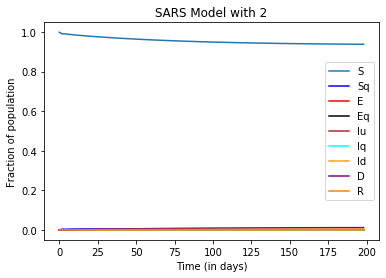

In [0]:
b = 0.06 
k = 10 
m = 0.2775
N = 1e7
p = 0.2
u = 0.1
v = 0.09
w = 0.1326

def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q = 0.2

start_time = 0
end_time = 200
dt = 2

n = int((end_time - start_time) / dt )

S = np.zeros(n)
Sq = np.zeros(n)
E = np.zeros(n)
Eq = np.zeros(n)
Iu = np.zeros(n)
Id = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)
Iq = np.zeros(n)

S[0] = N - 1e4
Iu[0] = 1e4

for i in range(1,len(S)):
  S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of population')
plt.title('SARS Model with 2')
plt.show()

S2=S
Iu2=Iu

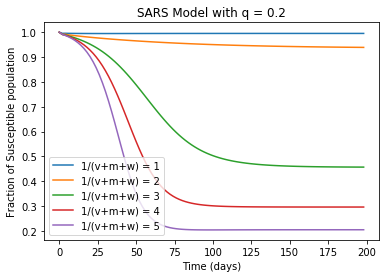

Text(0.5, 1.0, 'SARS Model with q = 0.2')

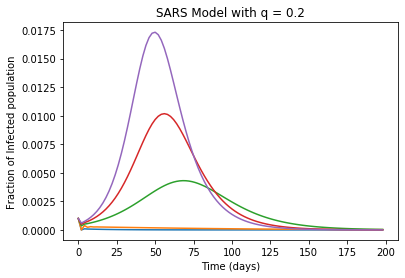

In [0]:

plt.plot(np.arange(start_time,end_time,dt),S1/N,label='1/(v+m+w) = 1')
plt.plot(np.arange(start_time,end_time,dt),S2/N,label='1/(v+m+w) = 2')
plt.plot(np.arange(start_time,end_time,dt),S3/N,label='1/(v+m+w) = 3')
plt.plot(np.arange(start_time,end_time,dt),S4/N,label='1/(v+m+w) = 4')
plt.plot(np.arange(start_time,end_time,dt),S5/N,label='1/(v+m+w) = 5')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Susceptible population')
plt.title('SARS Model with q = 0.2')
plt.show()
plt.plot(np.arange(start_time,end_time,dt),Iu1/N,label='1/(v+m+w) = 1')
plt.plot(np.arange(start_time,end_time,dt),Iu2/N,label='1/(v+m+w) = 2')
plt.plot(np.arange(start_time,end_time,dt),Iu3/N,label='1/(v+m+w) = 3')
plt.plot(np.arange(start_time,end_time,dt),Iu4/N,label='1/(v+m+w) = 4')
plt.plot(np.arange(start_time,end_time,dt),Iu5/N,label='1/(v+m+w) = 5')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Infected population')
plt.title('SARS Model with q = 0.2')

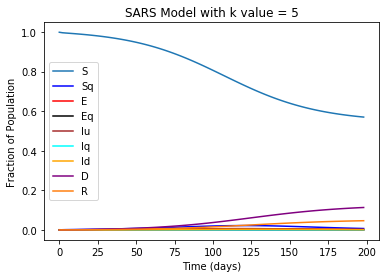

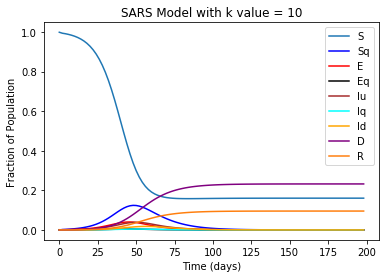

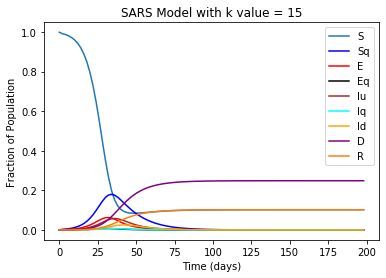

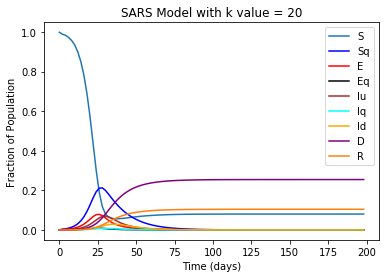

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
q = 0.1
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

k_values = np.arange(5,21,5)

for k in k_values:

  start_time = 0
  end_time = 200
  dt = 2
  
  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
  plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  plt.plot(np.arange(start_time,end_time,dt),Iu/N,label='Iu',color='brown')
  plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
  plt.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Fraction of Population')
  plt.title('SARS Model with k value = ' + str(round(k,2)))
  plt.show()



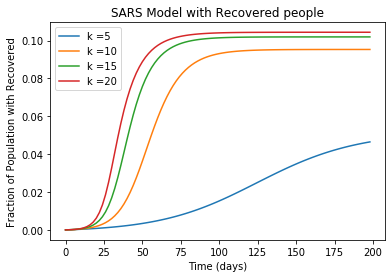

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
q = 0.1
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

k_values = np.arange(5,21,5)

for k in k_values:

  start_time = 0
  end_time = 200
  dt = 2
  
  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  # plt.plot(np.arange(start_time,end_time,dt),(S+Sq)/N,label ='k ='+str(round(k,2)))
  # plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  # plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  # plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  # plt.plot(np.arange(start_time,end_time,dt),(Iu+Id+Iq)/N,label='k ='+ str(round(k,2)))
  # plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  # plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  # plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  plt.plot(np.arange(start_time,end_time,dt),R/N,label='k ='+ str(round(k,2)))
  plt.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Fraction of Population with Recovered')
  plt.title('SARS Model with Recovered people')

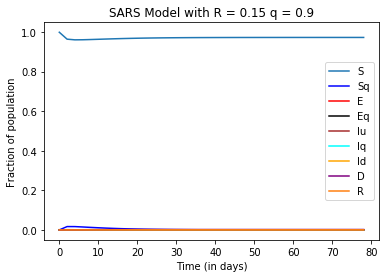

In [0]:
b = 0.06 
k = 10 
m = 0.2775
N = 1e7
p = 0.2
u = 0.1
v = 0.09
w = 0.0326

def s(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

q = 0.9

start_time = 0
end_time = 80
dt = 2
n = int((end_time - start_time) / dt )
S = np.zeros(n)
Sq = np.zeros(n)
E = np.zeros(n)
Eq = np.zeros(n)
Iu = np.zeros(n)
Id = np.zeros(n)
R = np.zeros(n)
D = np.zeros(n)
Iq = np.zeros(n)
t=np.arange(start_time,end_time,dt)
S[0] = N - 1e4
Iu[0] = 1e4

for i in range(1,len(S)):
  S[i] = S[i-1] + s(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Sq[i] = Sq[i-1] + sq(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  E[i] = E[i-1] + e(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Eq[i] = Eq[i-1] + eq(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iu[i] = Iu[i-1] + iu(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Id[i] = Id[i-1] + ids(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  Iq[i] = Iq[i-1] + iq(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  D[i] = D[i-1] + d(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  R[i] = R[i-1] + r(S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
plt.plot(t,S/N,label='S')
plt.plot(t,Sq/N,label='Sq',color='blue')
plt.plot(t,E/N,label='E',color='red')
plt.plot(t,Eq/N,label='Eq',color='black')
plt.plot(t,Iu/N,label='Iu',color='brown')
plt.plot(t,Iq/N,label='Iq',color='cyan')
plt.plot(t,Id/N,label='Id',color='orange')
plt.plot(t,D/N,label='D',color='purple')
plt.plot(t,R/N,label='R')
plt.legend()
plt.xlabel('Time (in days)')
plt.ylabel('Fraction of population')
plt.title('SARS Model with R = '+ str(round(k*b*(1-q)/(v+m+w),4))+ ' q = '+str(q))
plt.show()

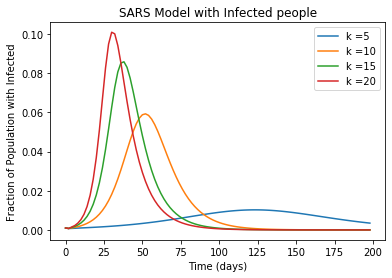

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
q = 0.1
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

k_values = np.arange(5,21,5)

for k in k_values:

  start_time = 0
  end_time = 200
  dt = 2
  
  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  # plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
  # plt.plot(np.arange(start_time,end_time,dt),Sq/N,label='Sq',color='blue')
  # plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  # plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  plt.plot(np.arange(start_time,end_time,dt),(Iu+Id+Iq)/N,label='k ='+ str(round(k,2)))
  # plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  # plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  # plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  # plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
  plt.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Fraction of Population with Infected')
  plt.title('SARS Model with Infected people')


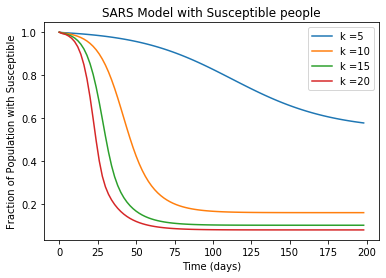

In [0]:
b = 0.06 
k = 10 
m = 0.0975
N = 1e7
p = 0.2
u = 0.1
v = 0.04
w = 0.0625
q = 0.1
def s(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return u*Sq - k*q*(1-b)*Iu*S/N - k*q*Iu*S/N - k*(1-q)*b*Iu*S/N

def sq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*(1-b)*Iu*S/N - u*Sq

def e(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*(1-q)*b*Iu*S/N - p*E

def eq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return k*q*b*Iu*S/N - p*Eq

def iu(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*E - m*Iu - v*Iu - w*Iu

def iq(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return p*Eq - m*Iq - v*Iq - w*Iq

def ids(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return w*Iu + w*Iq - v*Id - m*Id

def d(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return m*(Iu + Iq + Id)

def r(u,k,q,b,v,w,m,p,S,Sq,E,Eq,Iq,Iu,Id,D,R,N):
  return v*(Iu + Iq + Id)

k_values = np.arange(5,21,5)

for k in k_values:

  start_time = 0
  end_time = 200
  dt = 2
  
  n = int((end_time - start_time) / dt )
  
  S = np.zeros(n)
  Sq = np.zeros(n)
  E = np.zeros(n)

  Eq = np.zeros(n)
  Iu = np.zeros(n)
  Id = np.zeros(n)

  R = np.zeros(n)
  D = np.zeros(n)
  Iq = np.zeros(n)

  S[0] = N - 1e4
  Iu[0] = 1e4

  for i in range(1,len(S)):
    S[i] = S[i-1] + s(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Sq[i] = Sq[i-1] + sq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    E[i] = E[i-1] + e(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Eq[i] = Eq[i-1] + eq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iu[i] = Iu[i-1] + iu(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Id[i] = Id[i-1] + ids(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    Iq[i] = Iq[i-1] + iq(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    D[i] = D[i-1] + d(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
    R[i] = R[i-1] + r(u,k,q,b,v,w,m,p,S[i-1],Sq[i-1],E[i-1],Eq[i-1],Iq[i-1],Iu[i-1],Id[i-1],D[i-1],R[i-1],N)*dt
  # plt.plot(np.arange(start_time,end_time,dt),S/N,label='S')
  plt.plot(np.arange(start_time,end_time,dt),(S+Sq)/N,label='k ='+ str(round(k,2)))
  # plt.plot(np.arange(start_time,end_time,dt),E/N,label='E',color='red')
  # plt.plot(np.arange(start_time,end_time,dt),Eq/N,label='Eq',color='black')
  # plt.plot(np.arange(start_time,end_time,dt),(Iu+Id+Iq)/N,label='k ='+ str(round(k,2)))
  # plt.plot(np.arange(start_time,end_time,dt),Iq/N,label='Iq',color='cyan')
  # plt.plot(np.arange(start_time,end_time,dt),Id/N,label='Id',color='orange')
  # plt.plot(np.arange(start_time,end_time,dt),D/N,label='D',color='purple')
  # plt.plot(np.arange(start_time,end_time,dt),R/N,label='R')
  plt.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Fraction of Population with Susceptible')
  plt.title('SARS Model with Susceptible people')